In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt")  # You can choose a different model size

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 129MB/s]


In [ ]:
import cv2

image_path = "/content/sample.jpg"
image = cv2.imread(image_path)

In [ ]:
results = model.predict(image_path)


image 1/1 /content/sample.jpg: 448x640 7 persons, 2 chairs, 1 laptop, 1 keyboard, 1203.1ms
Speed: 12.7ms preprocess, 1203.1ms inference, 26.8ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    class_id = box.cls[0].item()
    confidence = box.conf[0].item()
    label = results[0].names[class_id]  # Get the label for the detected class
    print(f"Detected {label} at [{x1}, {y1}, {x2}, {y2}] with confidence {confidence}")

Detected person at [311.6644592285156, 134.4402313232422, 471.9139709472656, 318.8575439453125] with confidence 0.8520160913467407
Detected person at [0.37230947613716125, 99.70291900634766, 201.47601318359375, 400.5059814453125] with confidence 0.8441081047058105
Detected person at [358.5898742675781, 123.05195617675781, 588.500244140625, 404.55474853515625] with confidence 0.8319413065910339
Detected person at [171.8836212158203, 139.92054748535156, 286.16900634765625, 309.095703125] with confidence 0.8131505250930786
Detected person at [84.25858306884766, 150.4008026123047, 264.8179931640625, 404.5260925292969] with confidence 0.5990127921104431
Detected chair at [0.10657424479722977, 366.7259521484375, 90.40203857421875, 406.7757263183594] with confidence 0.5672547817230225
Detected person at [86.77324676513672, 150.59524536132812, 219.62197875976562, 281.58514404296875] with confidence 0.3920793831348419
Detected person at [274.2113342285156, 134.4006805419922, 469.6001892089844, 

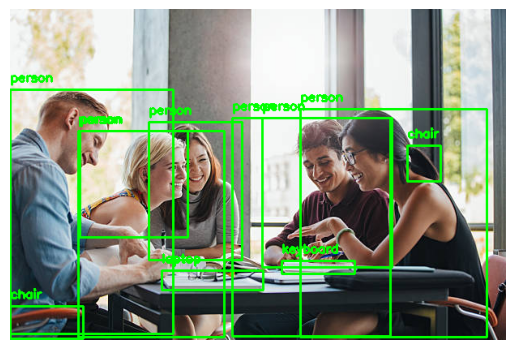

In [ ]:
import matplotlib.pyplot as plt

for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    label = results[0].names[box.cls[0].item()]
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def detect_objects(image_path, model_path="yolov8m.pt", confidence_threshold=0.5):
    # Load the model
    model = YOLO(model_path)

    # Load the image
    image = cv2.imread(image_path)

    # Run inference
    results = model.predict(image_path)

    # Process results
    detections = []
    for box in results[0].boxes:
        if box.conf[0].item() > confidence_threshold:
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            class_id = box.cls[0].item()
            confidence = box.conf[0].item()
            label = results[0].names[class_id]
            detections.append((label, (x1, y1, x2, y2), confidence))

            # Draw bounding box and label
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return detections

In [ ]:
import pickle

# Save the function to a pickle file
with open('yolo_detection_function.pkl', 'wb') as f:
    pickle.dump(detect_objects, f)

In [ ]:
from google.colab import files

files.download('yolo_detection_function.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>